In [9]:
import gmplot
import matplotlib.pyplot as plt
%matplotlib inline
import cPickle as pickle
import shapely

import pandas as pd
import numpy as np
import seaborn as sns

from mpl_toolkits.basemap import Basemap


In [5]:
import fiona
from shapely.geometry import Polygon, MultiPolygon, shape

In [9]:
shp1 = fiona.open('../map_visualization/sf_find_neigh/sf_find_neigh.shp')

In [10]:
boundary = shp1.bounds
boundary

(-122.5148972319999,
 37.708089209000036,
 -122.35698198799992,
 37.83239597600004)

In [13]:
#m = Basemap(projection='cyl', llcrnrlat=37.708089209000036,urcrnrlat=37.83239597600004,llcrnrlon=-122.5148972319999,urcrnrlon=-122.35698198799992)
m = Basemap(projection='cyl', llcrnrlat=37.708089209,urcrnrlat=37.832395976,llcrnrlon=-122.514897231,urcrnrlon=-122.356981987)

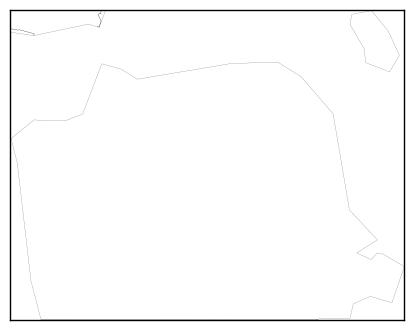

In [14]:
m.drawmapboundary()
m.drawcounties()

In [250]:
latl, latr = boundary[1], boundary[3]
longl, longr = boundary[0], boundary[2]

In [260]:
dis = 80

long_bins = np.linspace(longl, longr, dis)
lat_bins = np.linspace(latl, latr, dis)


In [261]:
print latl, latr, longl, longr

37.708089209 37.832395976 -122.514897232 -122.356981988


## for presentation

In [108]:
zip_map = crime2016['zipcode'].value_counts().index


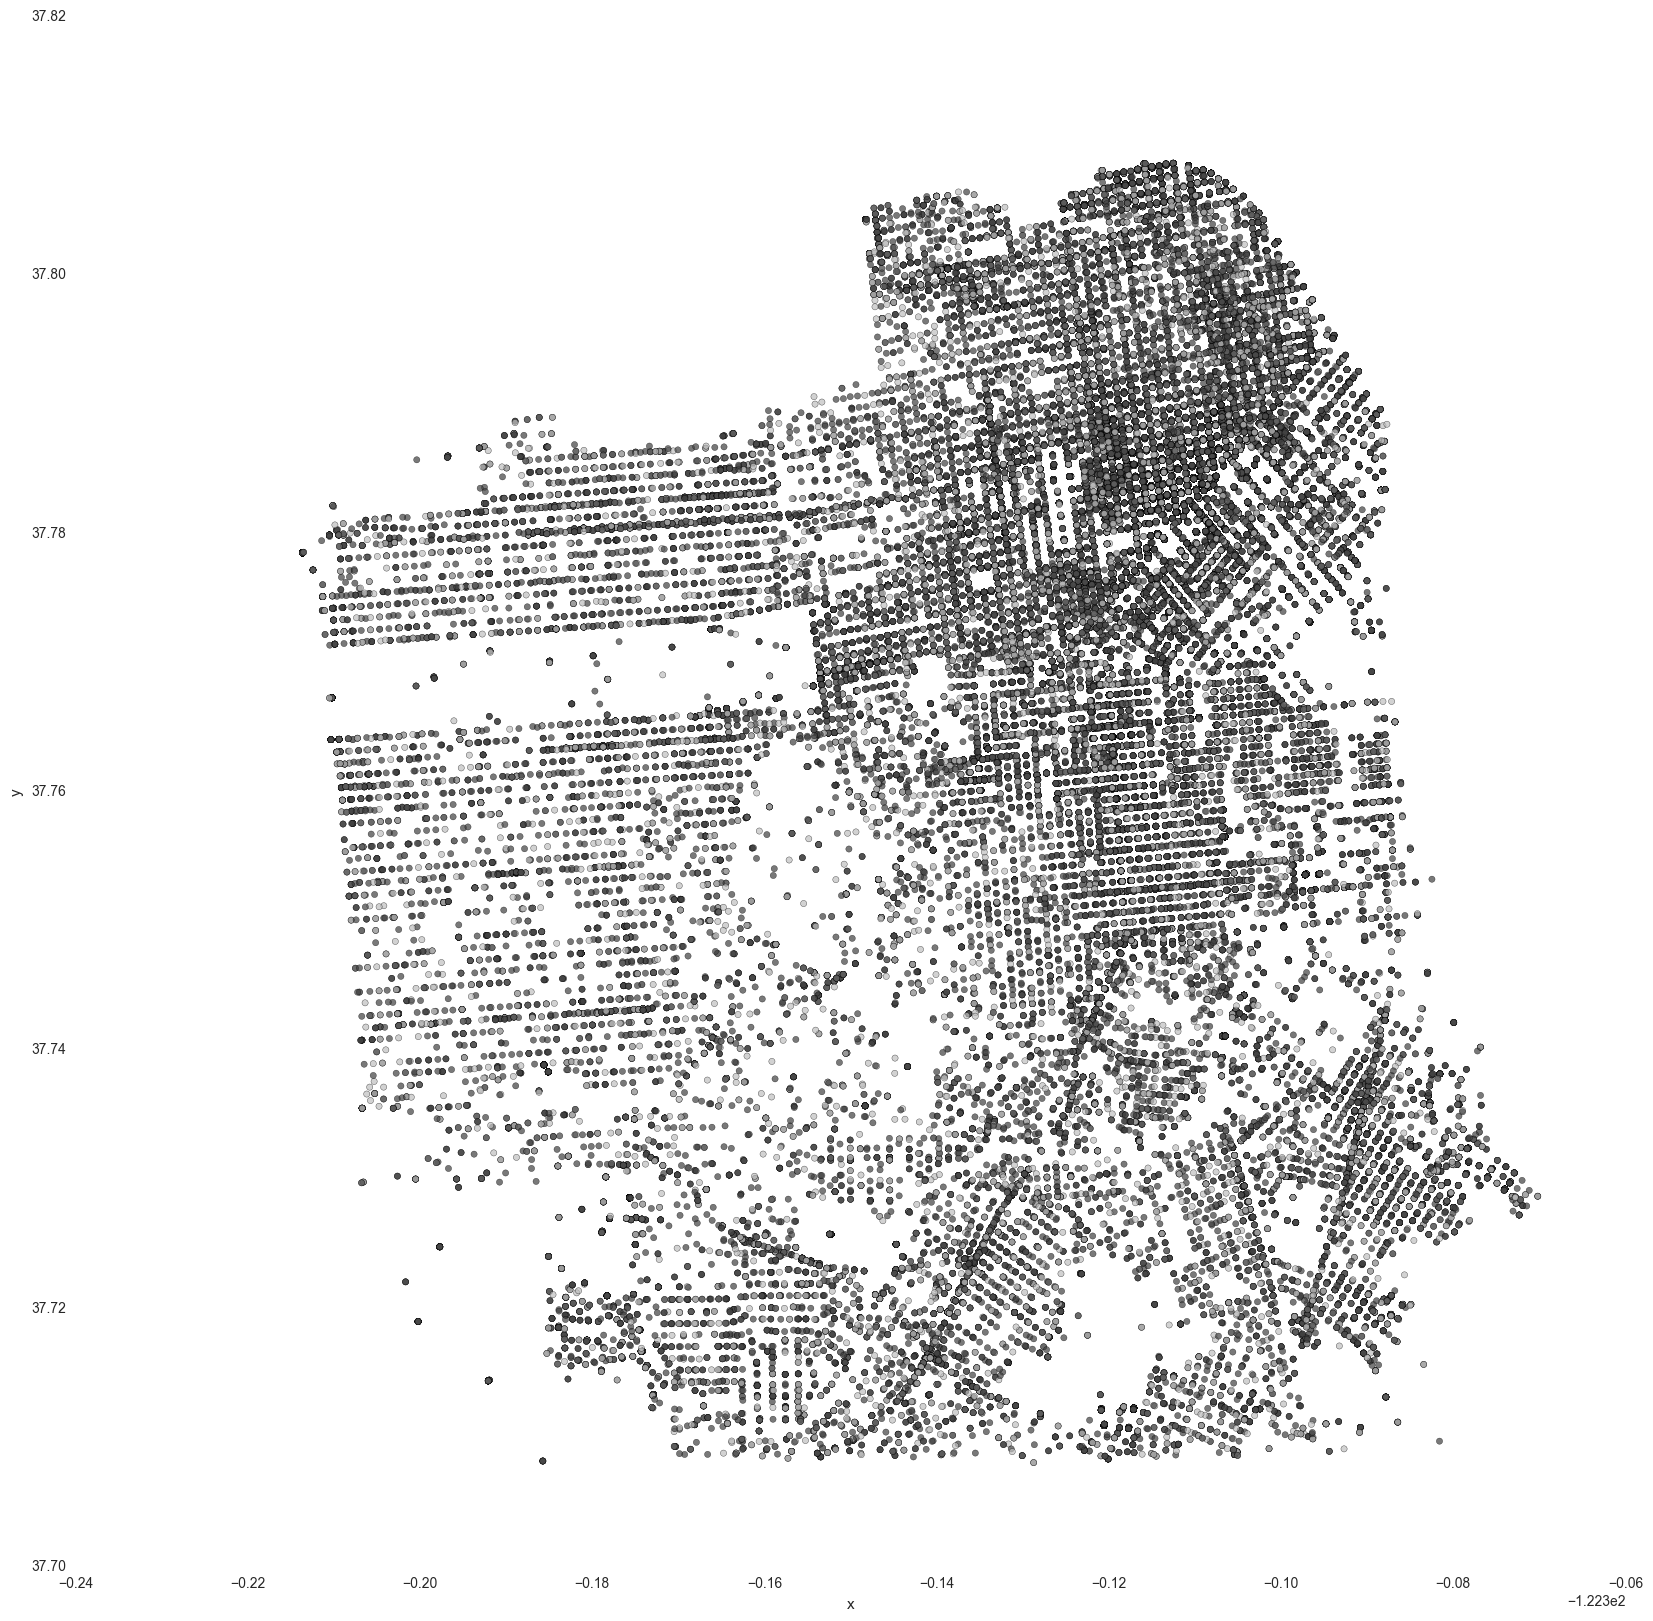

In [171]:
ax = plt.gca()
for z in zip_map:
    crime2016[crime2016['zipcode'] == z].plot('x', 'y', kind='scatter', figsize=(20,20),\
                                              alpha=0.7, c=['0.75','0.25','0.25'], ax=ax)

ax.set_axis_bgcolor('white')

In [107]:
crime2016.columns

Index([u'category', u'descript', u'dayofweek', u'time', u'pddistrict',
       u'resolution', u'address_x', u'x', u'y', u'location', u'address_y',
       u'neighborhood', u'new_time', u'hour', u'day', u'month', u'morning',
       u'afternoon', u'night', u'new_resolution', u'zipcode', u'tol_pop_male',
       u'tol_pop_female', u'age10_14', u'age15_19', u'age20_24', u'age25_34',
       u'age35_44', u'age45_54', u'age55_59', u'age60_64', u'age65_74',
       u'age75_84', u'age85_over', u'median_age_in_years', u'age18_over_male',
       u'age18_over_female', u'age65_over_male', u'age65_over_female',
       u'race_white', u'race_black', u'race_native', u'race_asian',
       u'race_hawaiian_pislander', u'race_others', u'race_his_lat',
       u'median_income', u'median_home_value', u'median_rent'],
      dtype='object')

## geopandas

In [29]:
import geopandas as gpd

In [30]:
sf = gpd.read_file('../map_visualization/2010_census_tracts_neighborhoods/census_tracts.shp')

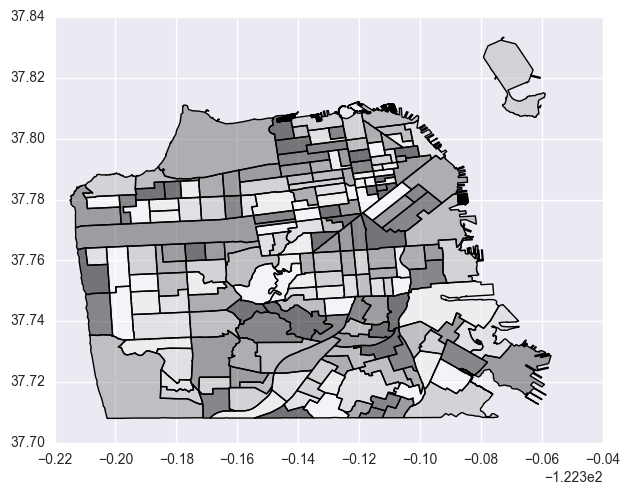

In [21]:
sf.plot()

In [227]:
crime2016[['x', 'y']].head(1)
# y is latitude and x is longitude

,x,y
0,-122.427271,37.798134


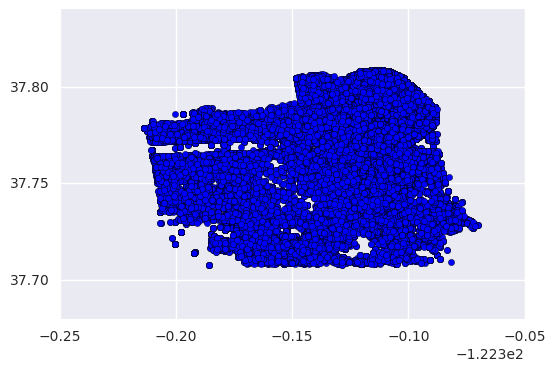

In [228]:
plt.scatter(crime2016['x'], crime2016['y'])

In [4]:
#missing person
#assault, sex offenses
#forcible, sex offenses, non forcible

#stabbing: threats against life, aggravated assault with a deadly weapon, aggravated assault with a knife
#aggravated assault with a gun

In [145]:
crime2016[crime2016.category == 'assault']['descript'].value_counts()
#crime2016.category.value_counts()

battery                                                           3277
threats against life                                              1321
inflict injury on cohabitee                                        937
aggravated assault with a deadly weapon                            873
battery, former spouse or dating relationship                      861
aggravated assault with bodily force                               691
false imprisonment                                                 345
aggravated assault with a knife                                    304
elder adult or dependent abuse (not embezzlement or theft)         271
child abuse (physical)                                             235
battery with serious injuries                                      223
battery of a police officer                                        141
aggravated assault with a gun                                      134
stalking                                                           109
threat

In [25]:
crime_drug = crime2016[crime2016.category == 'drug/narcotic']


import mplleaflet

f = plt.figure(figsize=(15, 8))
ax = f.gca()
plt.scatter(crime_drug['x'], crime_drug['y'])
mplleaflet.display(fig=f)

## geopandas

In [31]:
sf.head()

,geoid,geometry,nhood,shape_area,shape_len,tractce10
0,06075016400,POLYGON ((-122.4324669997095 37.77375700028448...,Hayes Valley,3.326589e+06,7589.679396,016400
1,06075016100,POLYGON ((-122.4235409996432 37.77967400025458...,Western Addition,3.970259e+06,8525.808755,016100
2,06075015900,POLYGON ((-122.4246870001921 37.78533500040309...,Western Addition,3.179072e+06,8000.966619,015900
3,06075015500,POLYGON ((-122.4246870001921 37.78533500040309...,Japantown,3.364565e+06,12144.016761,015500
4,06075015300,POLYGON ((-122.4349179998128 37.78587599994257...,Pacific Heights,2.515363e+06,6918.268026,015300


In [34]:
sf.crs

{'init': 'epsg:4326'}

In [35]:
sf = sf.to_crs({'init': 'epsg:4326'})

In [36]:
sf['geometry'].head()

0    POLYGON ((-122.4324669997095 37.77375700028448...
1    POLYGON ((-122.4235409996432 37.77967400025458...
2    POLYGON ((-122.4246870001921 37.78533500040309...
3    POLYGON ((-122.4246870001921 37.78533500040309...
4    POLYGON ((-122.4349179998128 37.78587599994257...
Name: geometry, dtype: object

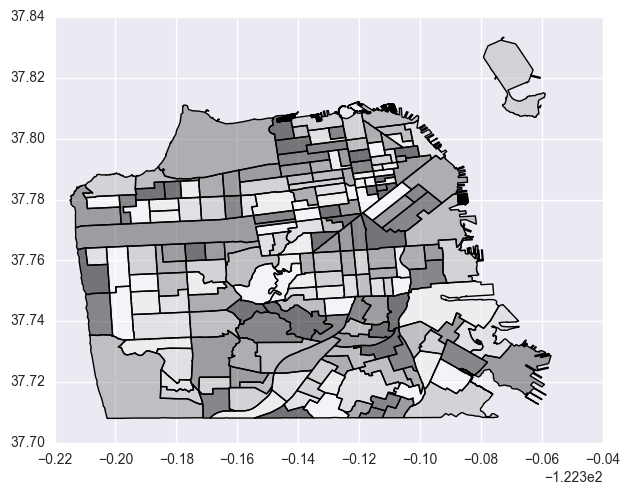

In [37]:
sf.plot()

In [38]:
import shapely

In [39]:
crime_drug=crime_drug.reset_index(drop=True)

In [40]:
listings2 = gpd.GeoDataFrame(crime_drug, geometry=crime_drug.apply(
        lambda srs: shapely.geometry.Point(srs['x'], srs['y']), axis='columns'
    ))

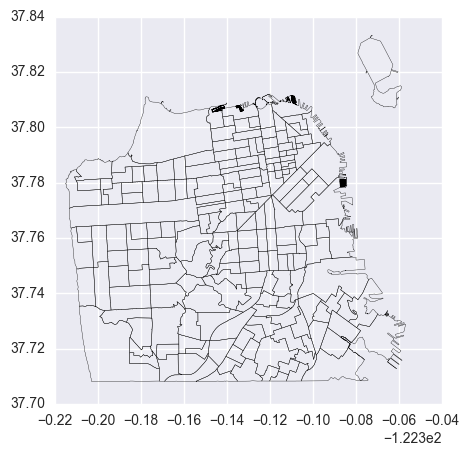

In [135]:
f = plt.figure(figsize=(5, 5))
ax = f.gca()

sf.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')

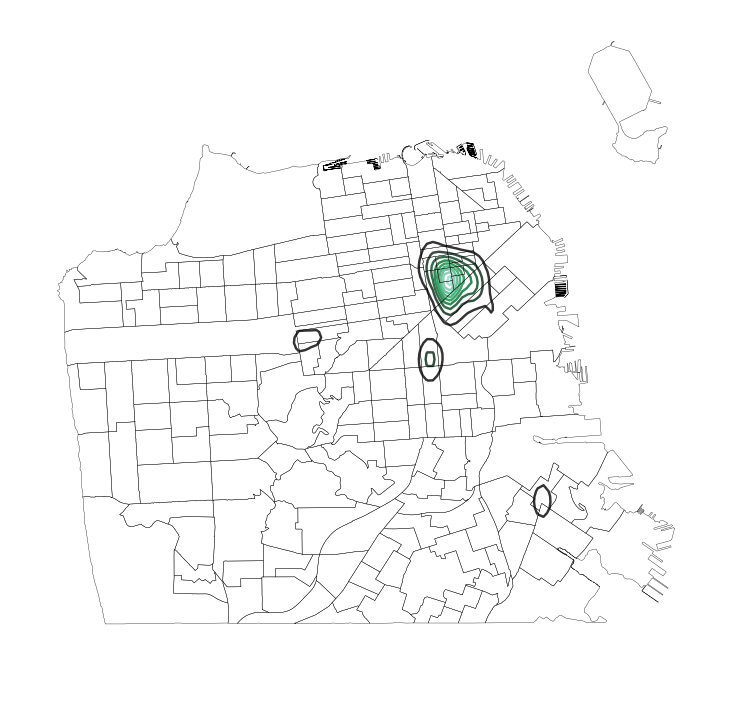

In [41]:
f = plt.figure(figsize=(8, 8))
ax = f.gca()

sf.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')
sns.kdeplot(data=listings2.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), 
            ax=ax, alpha=1)
ax.set_axis_off()

In [42]:
import numpy as np

def assign_census_tract(df):
    bools = [geom.contains(df['geometry']) for geom in sf['geometry']]
    if True in bools:
        return sf.iloc[bools.index(True)]['tractce10']
    else:
        return np.nan

In [43]:
#listings['census_tract'] = listings.apply(assign_census_tract, axis='columns')

In [129]:
sf.groupby('nhood')['drug'].sum().sort_values(ascending=False).head(20)

nhood
Tenderloin                        1083.0
South of Market                    517.0
Mission                            455.0
Bayview Hunters Point              221.0
Haight Ashbury                     149.0
Western Addition                   118.0
Financial District/South Beach     101.0
Castro/Upper Market                 87.0
Nob Hill                            85.0
Golden Gate Park                    54.0
North Beach                         43.0
Potrero Hill                        41.0
Excelsior                           38.0
Outer Mission                       32.0
Sunset/Parkside                     32.0
Pacific Heights                     32.0
Marina                              31.0
Hayes Valley                        30.0
Bernal Heights                      27.0
West of Twin Peaks                  26.0
Name: drug, dtype: float64

In [44]:
crime_drug['census_tract'] = crime_drug.apply(assign_census_tract, axis='columns')

In [45]:
crime_drug['census_tract'].value_counts().head()

012401    373
017601    345
012402    309
020100    166
012501    158
Name: census_tract, dtype: int64

In [46]:
sf['drug'] = sf['tractce10'].map(crime_drug['census_tract'].value_counts())

In [47]:
sf = sf.fillna(0)

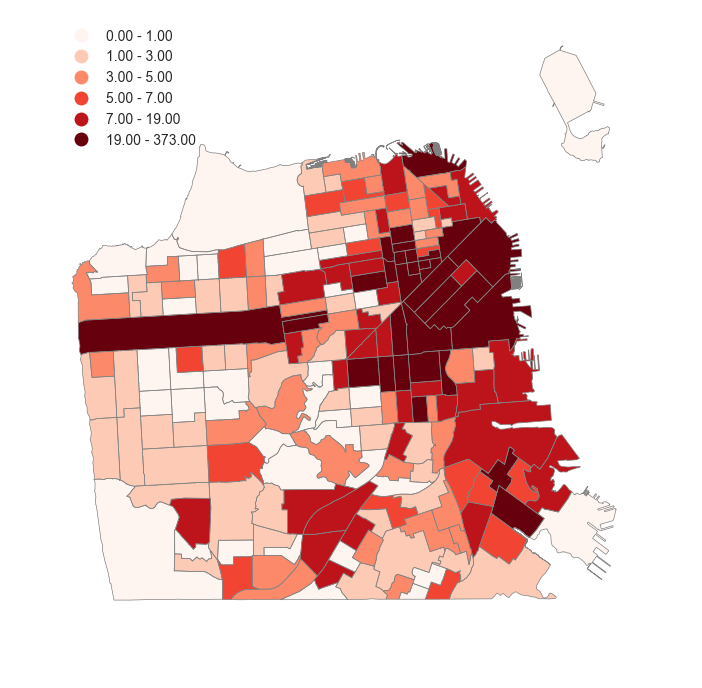

In [48]:
f = plt.figure(figsize=(8, 8))
ax = f.gca()
kw = dict(column='drug', k=6, cmap='Reds', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

In [339]:
sf

,geoid,geometry,nhood,shape_area,shape_len,tractce10,drug,drugDensity
0,06075016400,POLYGON ((-122.4324669997095 37.77375700028448...,Hayes Valley,3.326589e+06,7589.679396,016400,3.0,9.490684e+04
1,06075016100,POLYGON ((-122.4235409996432 37.77967400025458...,Western Addition,3.970259e+06,8525.808755,016100,33.0,8.746668e+05
2,06075015900,POLYGON ((-122.4246870001921 37.78533500040309...,Western Addition,3.179072e+06,8000.966619,015900,17.0,5.626990e+05
3,06075015500,POLYGON ((-122.4246870001921 37.78533500040309...,Japantown,3.364565e+06,12144.016761,015500,8.0,2.501951e+05
4,06075015300,POLYGON ((-122.4349179998128 37.78587599994257...,Pacific Heights,2.515363e+06,6918.268026,015300,1.0,4.183190e+04
5,06075015100,POLYGON ((-122.4219489996452 37.78848999964111...,Western Addition,1.876022e+06,5965.835573,015100,22.0,1.233926e+06
6,06075013400,"POLYGON ((-122.435486000546 37.78869699973431,...",Pacific Heights,3.811748e+06,8430.982653,013400,3.0,8.281089e+04
7,06075013200,"POLYGON ((-122.430183000411 37.79585400025761,...",Pacific Heights,5.883559e+06,12334.669664,013200,2.0,3.576500e+04
8,06075012700,(POLYGON ((-122.4404274465268 37.8081451936441...,Marina,4.908428e+06,40780.247031,012700,2.0,4.286476e+04
9,06075012100,"POLYGON ((-122.408402000068 37.78829299997246,...",Nob Hill,1.327996e+06,5234.011533,012100,5.0,3.961589e+05


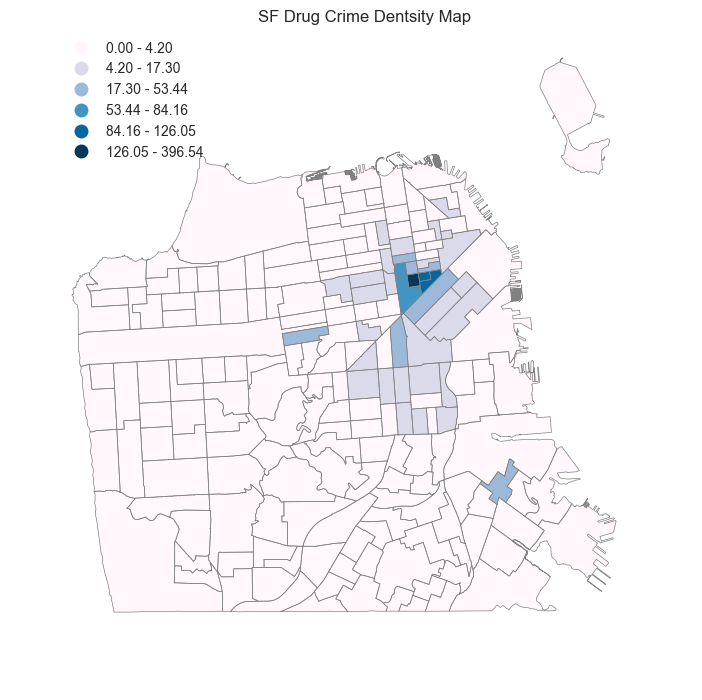

In [170]:
sf['drugDensity'] = (sf['drug'] / (sf['geometry'].to_crs({'init': 'epsg:4326'}).map(lambda p: p.area*10**5))).fillna(0)

f = plt.figure(figsize=(8, 8))
ax = f.gca()
kw = dict(column='drugDensity', k=6, cmap='PuBu', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='Fisher_Jenks',ax=ax, **kw)
ax.set_title('SF Drug Crime Dentsity Map')
ax.set_axis_off()

## Spatial Weights

In [51]:
import pysal as ps

In [52]:
qW = ps.queen_from_shapefile('../map_visualization/2010_census_tracts_neighborhoods/census_tracts.shp')

('Island id: ', [183])


## Spatial Lag

In [53]:
drug_spatial_lag = ps.lag_spatial(qW, sf['drugDensity'])
spatial_lag_class = ps.Quantiles(drug_spatial_lag, k=5)

In [62]:
drug_spatial_lag

array([  5.60616282e+06,   3.32678191e+06,   4.57262281e+06,
         4.41619192e+06,   6.33279521e+05,   1.55650675e+07,
         3.77870415e+05,   5.32954672e+05,   3.30041122e+05,
         1.11014840e+07,   1.63150477e+07,   2.68251631e+06,
         2.59471552e+06,   1.77890460e+06,   2.14273420e+06,
         4.57054263e+05,   5.95378938e+07,   1.31048209e+07,
         6.96242550e+07,   3.70364690e+06,   2.58604105e+06,
         1.36817406e+06,   5.95719580e+05,   7.81239861e+06,
         6.98978112e+05,   3.42387455e+05,   2.64186267e+05,
         1.15094531e+05,   7.86735261e+04,   1.79161397e+05,
         2.52364699e+05,   4.63373194e+05,   2.08162406e+06,
         7.54434736e+06,   7.96404444e+06,   1.41569818e+07,
         1.73022099e+06,   3.40571650e+06,   1.09534418e+06,
         7.36019595e+05,   4.52459942e+05,   2.13401982e+06,
         2.39781978e+07,   6.61469341e+06,   2.29966776e+06,
         1.62292267e+06,   9.31898900e+05,   6.17331663e+05,
         2.20150860e+05,

In [54]:
spatial_lag_class

                     Quantiles                      
 
   Lower                  Upper                Count
               x[i] <=   262226.883               39
  262226.883 < x[i] <=   481613.866               39
  481613.866 < x[i] <=  1305956.811               39
 1305956.811 < x[i] <=  3491840.052               39
 3491840.052 < x[i] <= 77291758.181               39

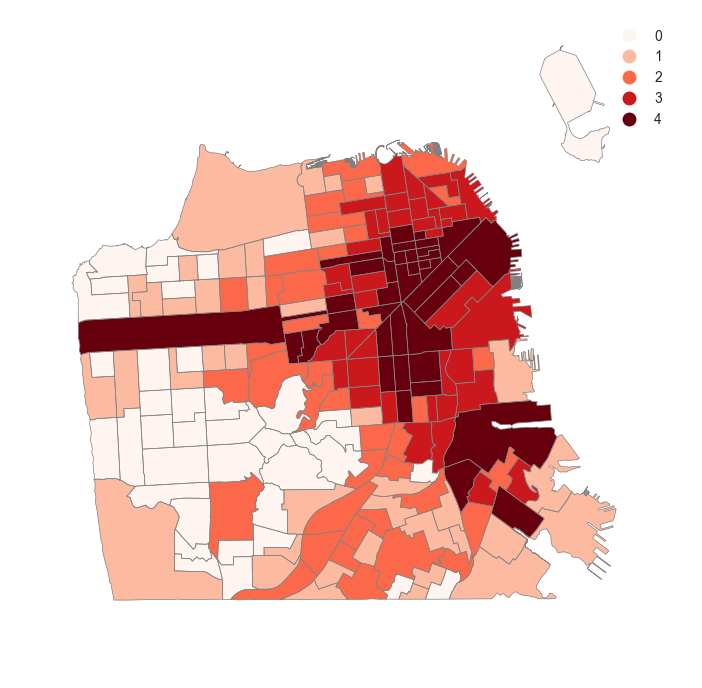

In [151]:
f = plt.figure(figsize=(8,8))
ax = f.gca()

kw = dict(column='spatial_class', k=5, cmap='Reds', alpha=1, legend=True, edgecolor='gray', 
          linewidth=0.5, categorical=True)
sf.assign(spatial_class=spatial_lag_class.yb).plot(ax=ax, **kw)
ax.set_axis_off()

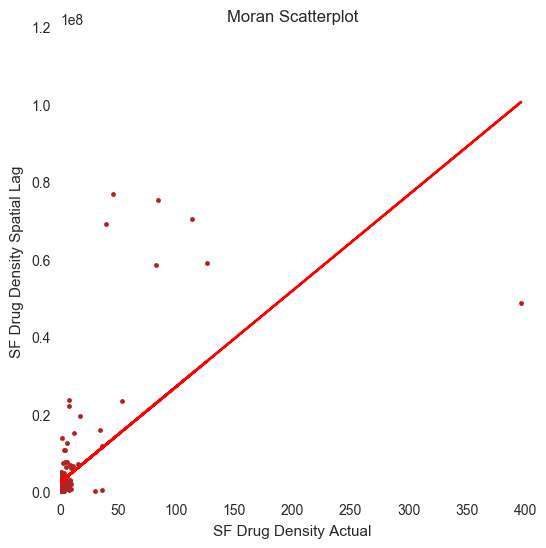

In [163]:
f, ax = plt.subplots(1, figsize=(6, 6))
plt.plot(sf['drugDensity'], drug_spatial_lag, '.', color='firebrick')

# Calculate and plot a line of best fit.
b,a = np.polyfit(sf['drugDensity'], drug_spatial_lag, 1)
plt.plot(sf['drugDensity'], a + b*sf['drugDensity'], 'r')

plt.title('Moran Scatterplot')
plt.ylabel('SF Drug Density Spatial Lag')
plt.xlabel('SF Drug Density Actual')
ax.set_axis_bgcolor('white')
plt.show()



In [12]:
from math import log


1.0986122886681098

In [179]:
moran = ps.Moran(sf['drugDensity'].values, qW)
moran.I, moran.p_sim

('WARNING: ', 183, ' is an island (no neighbors)')


(0.41629122701773785, 0.001)

## Spatial Clustering

In [180]:
listings2['descript'].value_counts()

possession of narcotics paraphernalia                821
possession of meth-amphetamine                       449
possession of marijuana                              370
possession of base/rock cocaine for sale             203
possession of meth-amphetamine for sale              198
possession of marijuana for sales                    160
possession of heroin                                 156
possession of heroin for sales                       137
possession of base/rock cocaine                      106
sale of base/rock cocaine                            104
possession of controlled substance                    97
possession of cocaine                                 88
possession of controlled substance for sale           78
sale of marijuana                                     66
loitering where narcotics are sold/used               56
possession of cocaine for sales                       46
transportation of marijuana                           32
sale of meth-amphetamine       

### possession and sale of drug (spatial clustering)

In [345]:
possession_of_drug = listings2.query('descript == "possession of narcotics paraphernalia" or\
                                      descript == "possession of meth-amphetamine" or\
                                      descript == "possession of marijuana" or\
                                      descript == "possession of heroin" or\
                                      descript == "possession of base/rock cocaine" or\
                                      descript == "possession of controlled substance" or\
                                      descript == "possession of cocaine" or\
                                      descript == "transportation of marijuana"').groupby('census_tract').count()['descript']

sale_of_drug = listings2.query('descript == "possession of base/rock cocaine for sale" or\
                                descript == "possession of meth-amphetamine for sale" or\
                                descript == "possession of marijuana for sales" or\
                                descript == "ppossession of heroin for sales" or\
                                descript == "sale of base/rock cocaine" or\
                                descript == "sale of marijuana" or\
                                descript == "loitering where narcotics are sold/used" or\
                                descript == "possession of cocaine for sales"').groupby('census_tract').count()['descript']

In [346]:
sf['drugDensity_poss_drug'] = sf['tractce10'].map(possession_of_drug).fillna(0)
sf['drugDensity_sale_drug'] = sf['tractce10'].map(sale_of_drug).fillna(0)

In [347]:
sf_drug_location = sf[['drugDensity', 'drugDensity_poss_drug', 'drugDensity_sale_drug']]

In [348]:
import sklearn.cluster
import sklearn.preprocessing

cl = sklearn.cluster.KMeans(n_clusters=3)
X = sklearn.preprocessing.scale(sf_drug_location.values)
classes = cl.fit(X)

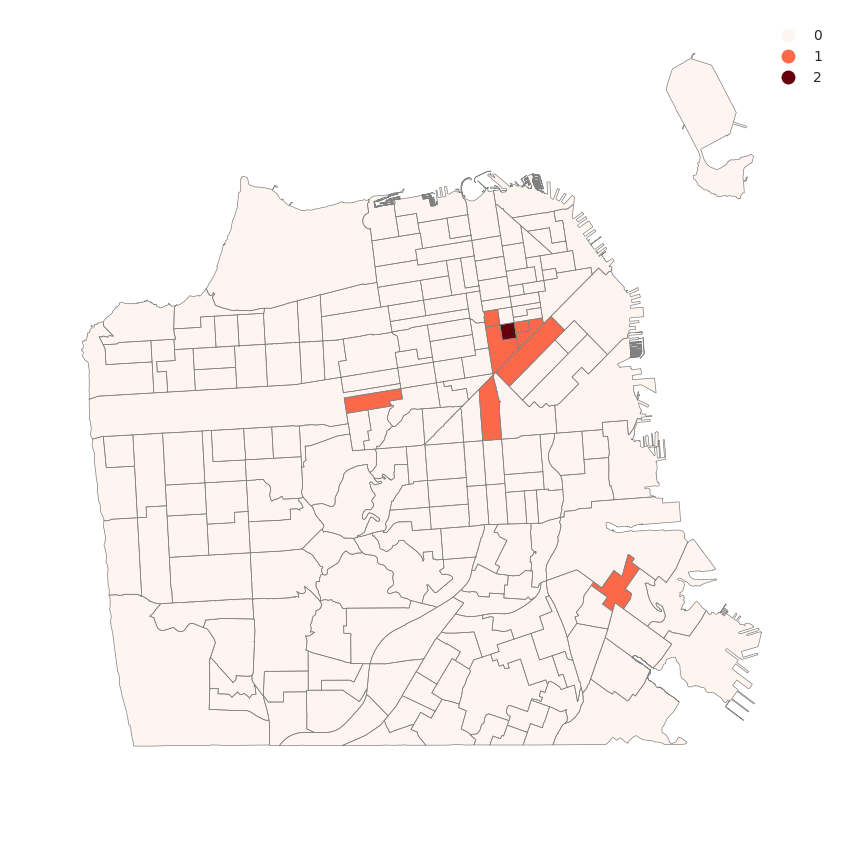

In [349]:
f = plt.figure(figsize=(10, 10))
ax = f.gca()

kw = dict(column='cluster', k=3, cmap='Reds', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
sf.assign(cluster=classes.labels_).plot(ax=ax, **kw)
ax.set_axis_off()

In [350]:
sf_drug_location.assign(cluster=classes.labels_).groupby('cluster').mean()

,drugDensity,drugDensity_poss_drug,drugDensity_sale_drug
cluster,,,
0,2.642018e+05,6.693548,1.317204
1,7.027320e+06,93.375000,56.875000
2,3.965440e+07,126.000000,133.000000


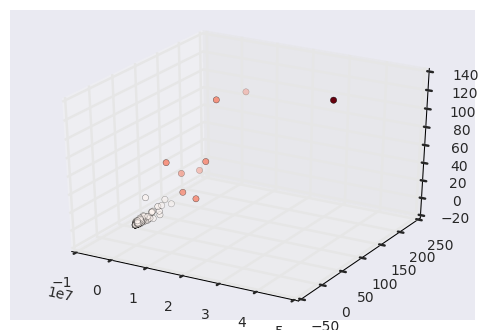

In [351]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sf_drug_location['drugDensity'], sf_drug_location['drugDensity_poss_drug'],
           zs=sf_drug_location['drugDensity_sale_drug'], c=classes.labels_, cmap='Reds')

In [9]:
cl = ps.region.maxp.Maxp(qW, sf_drug_location.values, 30, sf['drug'].values[:,None])

NameError: name 'sf_drug_location' is not defined

In [360]:
cl.

<bound method Maxp.cinference of <pysal.region.maxp.Maxp instance at 0x13f770170>>

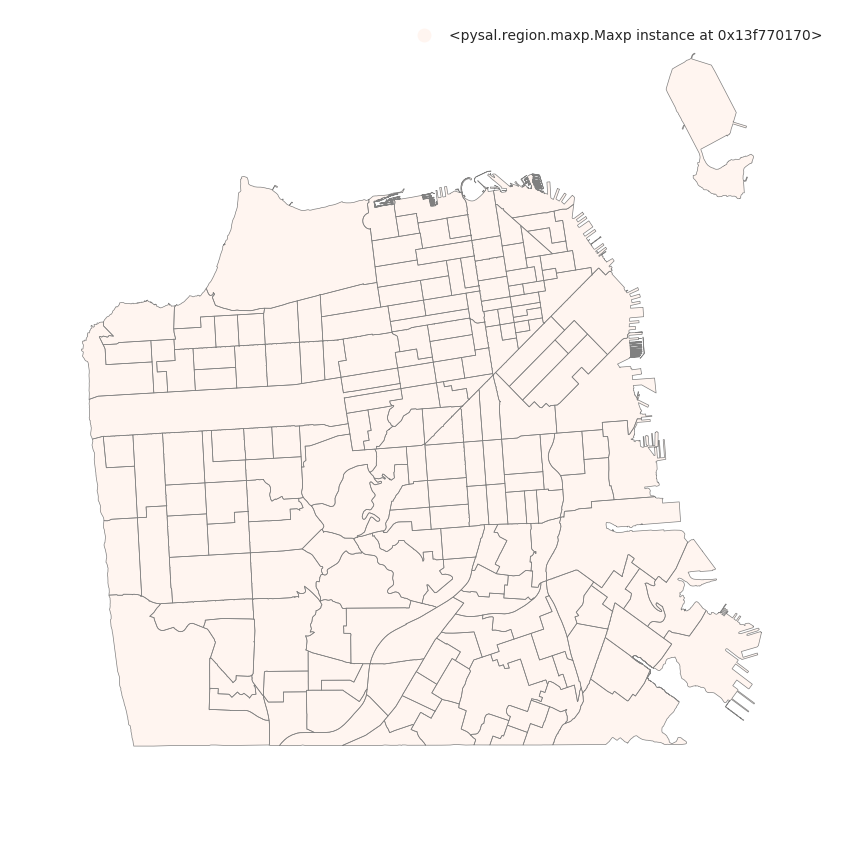

In [358]:
f = plt.figure(figsize=(10, 10))
ax = f.gca()

kw = dict(column='cluster', k=10, cmap='Reds', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
sf.assign(cluster=cl).plot(ax=ax, **kw)
ax.set_axis_off()

In [355]:
sf_drug_location.assign(cluster=cl.area2region.values()).groupby('cluster').mean()

AttributeError: Maxp instance has no attribute 'area2region'

## load or save work

In [16]:
with open('../final_dataset/crime2016_origin_modified_col.pkl') as handle:
    crime2016 = pickle.load(handle)

In [17]:
crime2016['category'].value_counts().head(30)

larceny/theft                  30244
other offenses                 15195
assault                        10554
vandalism                       6474
vehicle theft                   4990
warrants                        4698
burglary                        4540
suspicious occ                  4380
drug/narcotic                   3437
missing person                  3281
robbery                         2534
fraud                           2041
secondary codes                 1407
trespass                        1359
weapon laws                     1296
sex offenses, forcible           716
stolen property                  710
recovered vehicle                560
prostitution                     524
disorderly conduct               498
forgery/counterfeiting           470
drunkenness                      375
driving under the influence      274
arson                            221
kidnapping                       191
liquor laws                      126
embezzlement                     110
r

In [18]:
crime2016['descript'].value_counts().head(30)

grand theft from locked auto                 13073
battery                                       3277
petty theft of property                       3240
petty theft from locked auto                  3100
malicious mischief, vandalism                 3097
drivers license, suspended or revoked         2833
stolen automobile                             2830
warrant arrest                                2447
suspicious occurrence                         2253
malicious mischief, vandalism of vehicles     2221
investigative detention                       1869
enroute to outside jurisdiction               1698
traffic violation arrest                      1645
grand theft of property                       1589
found person                                  1479
petty theft from a building                   1443
traffic violation                             1377
grand theft from unlocked auto                1347
threats against life                          1321
petty theft shoplifting        

In [7]:
[col for col in crime2016.columns]

['category',
 'descript',
 'dayofweek',
 'time',
 'pddistrict',
 'resolution',
 'address_x',
 'x',
 'y',
 'location',
 'address_y',
 'neighborhood',
 'new_time',
 'hour',
 'day',
 'month',
 'morning',
 'afternoon',
 'night',
 'new_resolution',
 'zipcode',
 'tol_pop_male',
 'tol_pop_female',
 'age10_14',
 'age15_19',
 'age20_24',
 'age25_34',
 'age35_44',
 'age45_54',
 'age55_59',
 'age60_64',
 'age65_74',
 'age75_84',
 'age85_over',
 'median_age_in_years',
 'age18_over_male',
 'age18_over_female',
 'age65_over_male',
 'age65_over_female',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_hawaiian_pislander',
 'race_others',
 'race_his_lat',
 'median_income',
 'median_home_value',
 'median_rent']

In [148]:
## save stabbing one

#aggravated assault with a deadly weapon, aggravated assault with a knife
#aggravated assault with a gun

stabbing = crime2016[(crime2016.descript == 'aggravated assault with a deadly weapon') | \
          (crime2016.descript == 'aggravated assault with a knife') | \
          (crime2016.descript == '#aggravated assault with a gun')]

with open('../final_dataset/stabbing.pkl', 'wb') as handle:
    pickle.dump(stabbing, handle)

In [150]:
stabbing2 = crime2016[crime2016.descript == 'aggravated assault with a knife']
with open('../final_dataset/stabbing2.pkl', 'wb') as handle:
    pickle.dump(stabbing2, handle)